# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Import Data

In [2]:
data = pd.read_csv("F:/DS/MAIN PROJECT/FINAL/report/Analysis on smartphone app users.csv")
print(data.head())

   userid  Screen Time  Amount Spent on App (INR)  Review  Ratings  \
0    1001           17                        634       1        9   
1    1002            0                         54       0        4   
2    1003           37                        207       0        8   
3    1004           32                        445       1        6   
4    1005           45                        427       1        5   

   New Password Request  Last Visited Minutes       Status  
0                     7                  2990    Installed  
1                     8                 24008  Uninstalled  
2                     5                   971    Installed  
3                     2                   799    Installed  
4                     6                  3668    Installed  


# Data Exploration

In [3]:
data.shape

(999, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   userid                     999 non-null    int64 
 1   Screen Time                999 non-null    int64 
 2   Amount Spent on App (INR)  999 non-null    int64 
 3   Review                     999 non-null    int64 
 4   Ratings                    999 non-null    int64 
 5   New Password Request       999 non-null    int64 
 6   Last Visited Minutes       999 non-null    int64 
 7   Status                     999 non-null    object
dtypes: int64(7), object(1)
memory usage: 62.6+ KB


In [5]:
# Checking Null Values
data.isnull().sum()

userid                       0
Screen Time                  0
Amount Spent on App (INR)    0
Review                       0
Ratings                      0
New Password Request         0
Last Visited Minutes         0
Status                       0
dtype: int64

In [6]:
#OUTLIERS
data = pd.read_csv("F:/DS/MAIN PROJECT/FINAL/report/Analysis on smartphone app users.csv")

# extract numerical columns from data
X = data.select_dtypes(include=[np.number]).values

# set threshold for outlier detection
threshold = 3 

# calculate mean and standard deviation for each feature
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)

# identify outliers
outliers = np.where(np.abs((X - mean) / std) > threshold)[0]

# remove outliers from data
X_new = np.delete(X, outliers, axis=0)


# EDA

In [7]:
data['Review'].value_counts()

0    502
1    497
Name: Review, dtype: int64

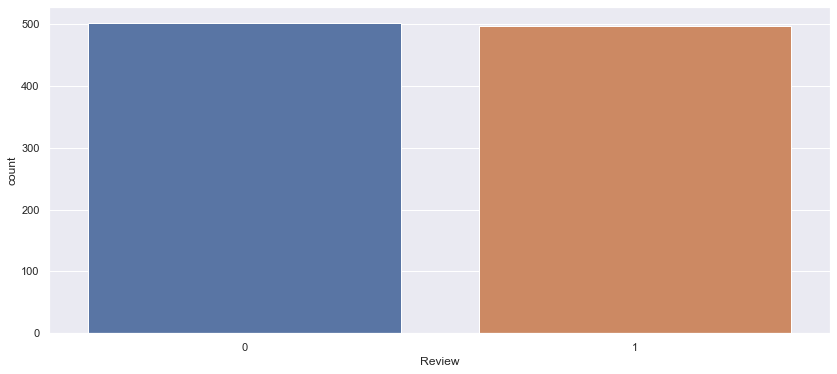

In [8]:
#Plot Bar plot for Review
plt.figure(figsize=(14,6))
ax = sns.countplot(x='Review',data=data)
plt.show()

In [9]:
data['Status'].value_counts()

Installed      916
Uninstalled     83
Name: Status, dtype: int64

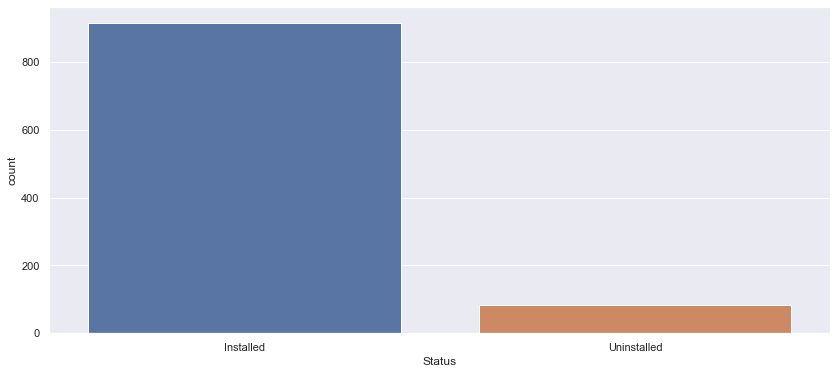

In [10]:
plt.figure(figsize=(14,6))
ax = sns.countplot(x='Status',data=data)
plt.show()

In [11]:
#Checking No. of Ratings given by Users
data['Ratings'].value_counts()

9     142
5     141
10    137
7     136
8     133
6     131
2      42
0      38
4      35
1      32
3      32
Name: Ratings, dtype: int64

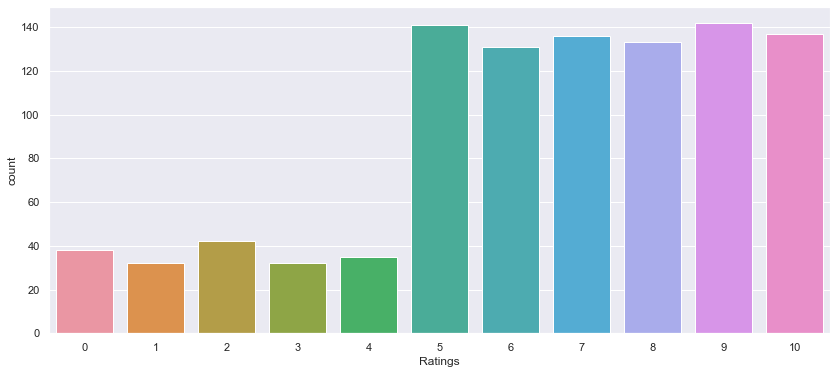

In [12]:
plt.figure(figsize=(14,6))
ax = sns.countplot(x='Ratings',data=data)
plt.show()

In [13]:
## Checking how many times users requests for new Password
data['New Password Request'].value_counts()

6     138
8     123
4     122
1     121
7     120
5     113
3     108
2     106
15     11
10     10
11      8
9       7
13      5
14      5
12      2
Name: New Password Request, dtype: int64

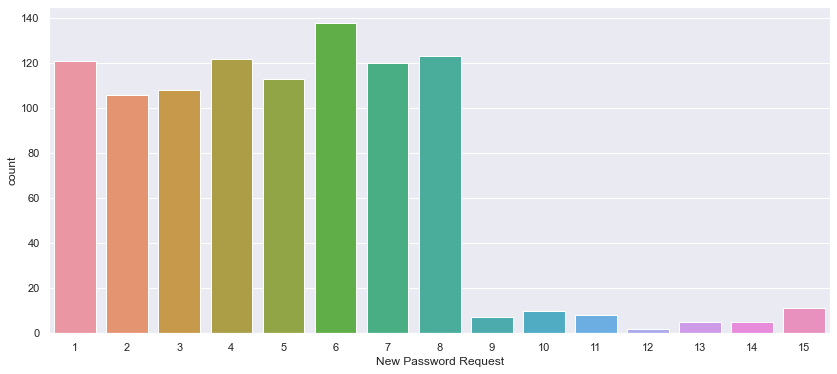

In [14]:
plt.figure(figsize=(14,6))
ax = sns.countplot(x='New Password Request',data=data)
plt.show()

In [15]:
data['Amount Spent on App (INR)'].value_counts()

93     9
73     8
75     7
31     6
87     6
      ..
522    1
198    1
517    1
202    1
998    1
Name: Amount Spent on App (INR), Length: 606, dtype: int64

In [16]:
data.head()

,userid,Screen Time,Amount Spent on App (INR),Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17,634,1,9,7,2990,Installed
1,1002,0,54,0,4,8,24008,Uninstalled
2,1003,37,207,0,8,5,971,Installed
3,1004,32,445,1,6,2,799,Installed
4,1005,45,427,1,5,6,3668,Installed


# Highest, lowest, and average screen time of all the users

In [17]:
lowest_screen_time = data['Screen Time'].min()
avg_screen_time = data['Screen Time'].mean()
highest_screen_time = data['Screen Time'].max()

print(f'The Lowest Screen Time is: {lowest_screen_time}')
print(f'The Average Screen Time is: {avg_screen_time}')
print(f'The Highest Screen Time is: {highest_screen_time}')

The Lowest Screen Time is: 0
The Average Screen Time is: 24.39039039039039
The Highest Screen Time is: 50


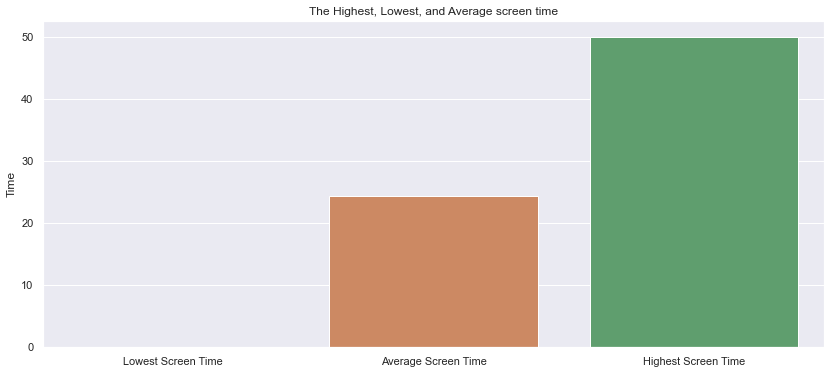

In [18]:
#Plot
labels = ['Lowest Screen Time','Average Screen Time','Highest Screen Time']
values = [lowest_screen_time,avg_screen_time,highest_screen_time]
plt.figure(figsize=(14,6))
plt.title('The Highest, Lowest, and Average screen time')
plt.ylabel('Time')
ax = sns.barplot(x=labels,y=values)
plt.show()

# Highest, lowest, and the average amount spent by all the users

In [19]:
lowest_spend = data['Amount Spent on App (INR)'].min()
avg_spend = data['Amount Spent on App (INR)'].mean()
highest_spend = data['Amount Spent on App (INR)'].max()

print(f'The Lowest spend on app is: {lowest_spend}')
print(f'The Average spend on app is: {avg_spend}')
print(f'The Highest spend on app is: {highest_spend}')

The Lowest spend on app is: 0
The Average spend on app is: 424.4154154154154
The Highest spend on app is: 998


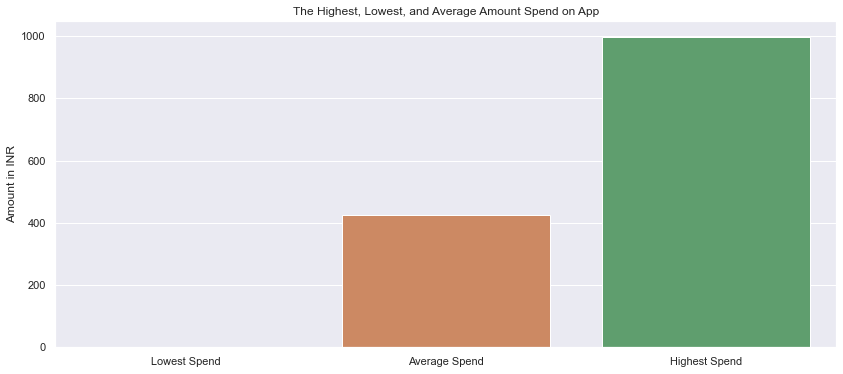

In [20]:
#Plot
labels = ['Lowest Spend','Average Spend','Highest Spend']
values = [lowest_spend,avg_spend,highest_spend]
plt.figure(figsize=(14,6))
plt.title('The Highest, Lowest, and Average Amount Spend on App')
plt.ylabel('Amount in INR')
ax = sns.barplot(x=labels,y=values)
plt.show()

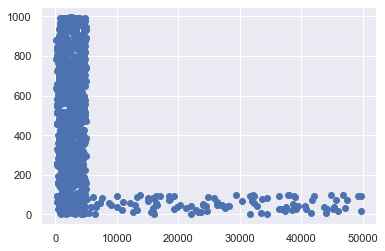

In [21]:
plt.scatter(data['Last Visited Minutes'],data['Amount Spent on App (INR)'])


# Elbow Method

In [22]:
clustering_data = data[["Screen Time", "Review", 
                        "Ratings", "Last Visited Minutes", 
                        "Amount Spent on App (INR)", 
                        "New Password Request"]]
    

In [23]:
for i in clustering_data.columns:
    MinMaxScaler(i)

In [24]:
clustering_data.head()

,Screen Time,Review,Ratings,Last Visited Minutes,Amount Spent on App (INR),New Password Request
0,17,1,9,2990,634,7
1,0,0,4,24008,54,8
2,37,0,8,971,207,5
3,32,1,6,799,445,2
4,45,1,5,3668,427,6


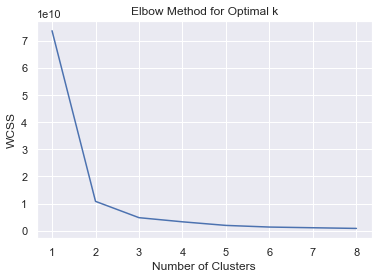

In [25]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have your data loaded in the 'clustering_data' variable

k_range = range(1, 9)
wcss = []

for i in k_range:
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(clustering_data)
    wcss.append(kmeans.inertia_)

# Now, you can plot the Within-Cluster-Sum-of-Squares (WCSS) against the number of clusters
plt.plot(k_range, wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()


In [26]:
#FIT & PREDICT(labels)

In [27]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[["Last Visited Minutes", "Amount Spent on App (INR)"]])
y_predicted

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [28]:
data['Segments'] = y_predicted
data.head()

,userid,Screen Time,Amount Spent on App (INR),Review,Ratings,New Password Request,Last Visited Minutes,Status,Segments
0,1001,17,634,1,9,7,2990,Installed,0
1,1002,0,54,0,4,8,24008,Uninstalled,2
2,1003,37,207,0,8,5,971,Installed,0
3,1004,32,445,1,6,2,799,Installed,0
4,1005,45,427,1,5,6,3668,Installed,0


In [29]:
km.cluster_centers_

array([[ 2673.32197802,   460.82527473],
       [39574.75555556,    53.33333333],
       [20277.29545455,    50.90909091]])

In [30]:
data.Segments.unique()

array([0, 2, 1])

In [31]:
data1 = data[data.Segments==0]
data2 = data[data.Segments==1]
data3 = data[data.Segments==2]

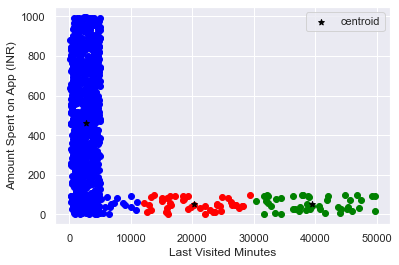

In [32]:
plt.scatter(data1['Last Visited Minutes'],data1['Amount Spent on App (INR)'],color='blue')
plt.scatter(data2['Last Visited Minutes'],data2['Amount Spent on App (INR)'],color='green')
plt.scatter(data3['Last Visited Minutes'],data3['Amount Spent on App (INR)'],color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')

plt.xlabel('Last Visited Minutes')
plt.ylabel('Amount Spent on App (INR)')
plt.legend()

In [33]:
scaler = MinMaxScaler()

scaler.fit(data[['Amount Spent on App (INR)']])
data['Amount Spent on App (INR)'] = scaler.transform(data[['Amount Spent on App (INR)']])

scaler.fit(data[['Last Visited Minutes']])
data['Last Visited Minutes'] = scaler.transform(data[['Last Visited Minutes']])
data.head()

,userid,Screen Time,Amount Spent on App (INR),Review,Ratings,New Password Request,Last Visited Minutes,Status,Segments
0,1001,17,0.635271,1,9,7,0.056328,Installed,0
1,1002,0,0.054108,0,4,8,0.480814,Uninstalled,2
2,1003,37,0.207415,0,8,5,0.015551,Installed,0
3,1004,32,0.445892,1,6,2,0.012077,Installed,0
4,1005,45,0.427856,1,5,6,0.070021,Installed,0


In [34]:
# PARTITIONAL CLUSTERING

# KMeans Clustering

In [35]:
kmeans_model = KMeans(n_clusters=3,n_init=10)
clusters = kmeans_model.fit_predict(clustering_data)
data['Segments'] = clusters
data

,userid,Screen Time,Amount Spent on App (INR),Review,Ratings,New Password Request,Last Visited Minutes,Status,Segments
0,1001,17,0.635271,1,9,7,0.056328,Installed,0
1,1002,0,0.054108,0,4,8,0.480814,Uninstalled,1
2,1003,37,0.207415,0,8,5,0.015551,Installed,0
3,1004,32,0.445892,1,6,2,0.012077,Installed,0
4,1005,45,0.427856,1,5,6,0.070021,Installed,0
...,...,...,...,...,...,...,...,...,...
994,1995,38,0.939880,0,5,4,0.033607,Installed,0
995,1996,43,0.061122,0,6,8,0.022741,Installed,0
996,1997,47,0.762525,0,6,1,0.035041,Installed,0
997,1998,6,0.073146,1,5,1,0.065335,Installed,0


In [36]:
data['Segments'].value_counts()

0    910
2     45
1     44
Name: Segments, dtype: int64

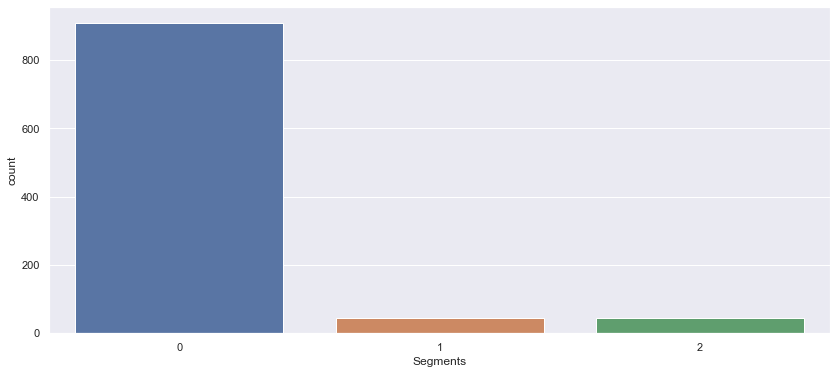

In [37]:
plt.figure(figsize=(14,6))
ax = sns.countplot(x='Segments',data=data)
plt.show()

# Rename the segments

In [38]:
data["Segments"] = data["Segments"].map({0: "Retained", 1: 
    "Needs Attention", 2: "Churn"})
data.head()

,userid,Screen Time,Amount Spent on App (INR),Review,Ratings,New Password Request,Last Visited Minutes,Status,Segments
0,1001,17,0.635271,1,9,7,0.056328,Installed,Retained
1,1002,0,0.054108,0,4,8,0.480814,Uninstalled,Needs Attention
2,1003,37,0.207415,0,8,5,0.015551,Installed,Retained
3,1004,32,0.445892,1,6,2,0.012077,Installed,Retained
4,1005,45,0.427856,1,5,6,0.070021,Installed,Retained


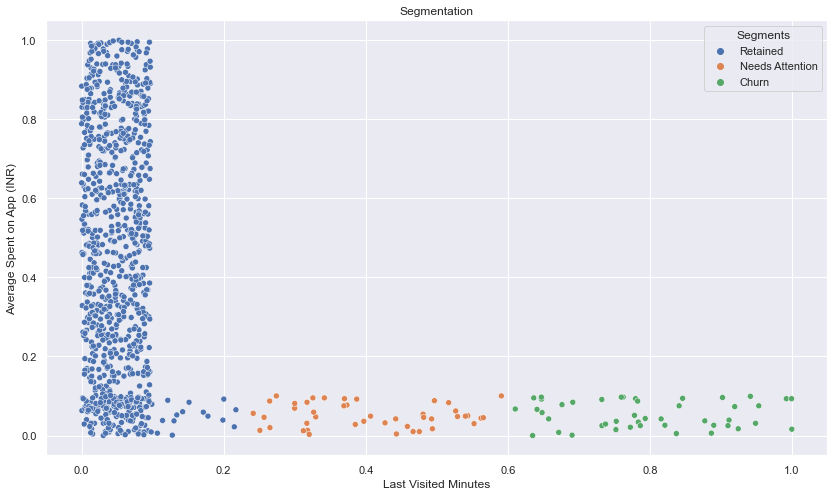

In [39]:
plt.figure(figsize=(14,8))
sns.scatterplot(data=data, x='Last Visited Minutes', y='Amount Spent on App (INR)', hue='Segments')
plt.xlabel('Last Visited Minutes')
plt.ylabel('Average Spent on App (INR)')
plt.title('Segmentation')
plt.show()